# NLP: CLASSIFICATION OF SONG LYRICS WITH EXPLICIT CONTENT

## Part 4: Model Evaluation

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from src.evaluate import *

### Load results

In [2]:
file = open("./data/X_train.pickle", "rb")
X_train = pickle.load(file)
file = open("./data/X_test.pickle", "rb")
X_test = pickle.load(file)
file = open("./data/y_train.pickle", "rb")
y_train = pickle.load(file)
file = open("./data/y_test.pickle", "rb")
y_test = pickle.load(file)

file = open("./results/models/lr_model.pickle", "rb")
lr_model = pickle.load(file)
file = file = open("./results/models/svm_model.pickle", "rb")
svm_model = pickle.load(file)
file = open("./results/models/rf_model.pickle", "rb")
rf_model = pickle.load(file)
file = file = open("./results/models/gb_model.pickle", "rb")
gb_model = pickle.load(file)
file = file = open("./results/models/nb_model.pickle", "rb")
nb_model = pickle.load(file)

file = open("./results/predictions/lr_train_pred.pickle", "rb")
lr_train_pred = pickle.load(file)
file = open("./results/predictions/svm_train_pred.pickle", "rb")
svm_train_pred = pickle.load(file)
file = open("./results/predictions/rf_train_pred.pickle", "rb")
rf_train_pred = pickle.load(file)
file = open("./results/predictions/gb_train_pred.pickle", "rb")
gb_train_pred = pickle.load(file)
file = open("./results/predictions/nb_train_pred.pickle", "rb")
nb_train_pred = pickle.load(file)


file = open("./results/predictions/lr_test_pred.pickle", "rb")
lr_test_pred = pickle.load(file)
file = open("./results/predictions/svm_test_pred.pickle", "rb")
svm_test_pred = pickle.load(file)
file = open("./results/predictions/rf_test_pred.pickle", "rb")
rf_test_pred = pickle.load(file)
file = open("./results/predictions/gb_test_pred.pickle", "rb")
gb_test_pred = pickle.load(file)
file = open("./results/predictions/nb_test_pred.pickle", "rb")
nb_test_pred = pickle.load(file)

file = open("./results/predictions/rf_fi.pickle", "rb")
rf_fi = pickle.load(file)
file = open("./results/predictions/gb_fi.pickle", "rb")
gb_fi = pickle.load(file)

### Evaluate models

We use 5 different metrics to evaluate model performance: confusion matrix, precision, recall, F1 score, and area under the ROC curve (AUC). We also take a look at the most important features (using Gini importance) determined by our tree-based models to see if they make sense.

#### Confusion matrix

The test set confusion matrix for each model is printed below (we also have training set confusion matrices that you can uncomment and inspect). The logistic regression and linear SVM have produced similar results, with a comparable number of false negative (FN) and false positives (FP). The random forest and gradient boost have produced similar numbers of FNs, but the random forest has a lot more FPs than the gradient boost. This could be because random forests learns from all observations at once, as opposed to learning from mistakes made by previous trees. The na&iuml;ve Bayes model has produced the most number of FNs and FPs.

Depending on the purpose of classification, we may need to treat FNs and FPs as equally important and reduce the number of both as much as possible. However, the most common use case of explicit content detection is to prevent certain audiences (_eg_. children) from access explicit materials. Therefore, one may argue that it is spend more of our attention on reducing the number of FNs only. If this is our evaluation criteria, then the random forest gives us the best detection results. However, due to the high (indeed the highest) numbers of FP predictions generated the random forest, we believe the gradient boost is the best model, with only a few (in the single digits) more FNs than the random forest and no FPs whatsoever. Logistic regression and SVM come after the tree-based models, and we confirm our earlier suspicions that na&iuml;ve Bayes is not suited for this problem.

In [3]:
# Test set confusion matrices
lr_cm = make_cm(y_test, lr_test_pred)
svm_cm = make_cm(y_test, svm_test_pred)
rf_cm = make_cm(y_test, rf_test_pred)
gb_cm = make_cm(y_test, gb_test_pred)
nb_cm = make_cm(y_test, nb_test_pred)

In [4]:
lr_cm

,actual_clean,actual_explicit
predicted_clean,5568,271
predicted_explicit,3,5724


In [5]:
svm_cm

,actual_clean,actual_explicit
predicted_clean,5538,301
predicted_explicit,4,5723


In [6]:
rf_cm

,actual_clean,actual_explicit
predicted_clean,5758,81
predicted_explicit,551,5176


In [7]:
gb_cm

,actual_clean,actual_explicit
predicted_clean,5751,88
predicted_explicit,0,5727


In [8]:
nb_cm

,actual_clean,actual_explicit
predicted_clean,4025,1814
predicted_explicit,102,5625


In [9]:
# Training set confusion matrices
# lr_cm = make_cm(y_train, lr_train_pred)
# svm_cm = make_cm(y_train, svm_train_pred)
# rf_cm = make_cm(y_train, rf_train_pred)
# gb_cm = make_cm(y_train, gb_train_pred)
# nb_cm = make_cm(y_train, nb_train_pred)

In [10]:
# lr_cm

In [11]:
# svm_cm

In [12]:
# rf_cm

In [13]:
# gb_cm

In [14]:
# nb_cm

#### Precision, recall, and F1 score

We use precision, recall, and F1 score to better summarize the information from the confusion matrices. The test scores show that the gradient boost has the best overall performance, and that the na&iuml;ve Bayes has the worst. This is consistent with our analysis using the confusion matrices.

In [15]:
train = [lr_train_pred, svm_train_pred, rf_train_pred, gb_train_pred, nb_train_pred]
test = [lr_test_pred, svm_test_pred, rf_test_pred, gb_test_pred, nb_test_pred]
make_summary(y_train, y_test, train, test)

,precision_test,recall_test,f1_test,precision_train,recall_train,f1_train
logistic_regression,0.954796,0.999476,0.976625,0.988133,0.999885,0.993974
linear_svm,0.950033,0.999302,0.974045,1.000000,0.998449,0.999224
random_forest,0.984592,0.903789,0.942462,0.998553,0.911864,0.953242
gradient_boost,0.984867,1.000000,0.992376,1.000000,1.000000,1.000000
naive_bayes,0.756150,0.982190,0.854474,0.768635,0.985866,0.863802


#### ROC and AUC

We overlay the ROC curves for all of the models and compute their AUC. Compared to the other performance metrics, it is not very obvious which model is the best judging by the AUC, as most of them fall in the 0.99 - 1 range (but these are still very promising numbers!). However, we can still see from the ROC curves that the gradient boost performs best, while the na&iuml;ve Bayes performs the worst.

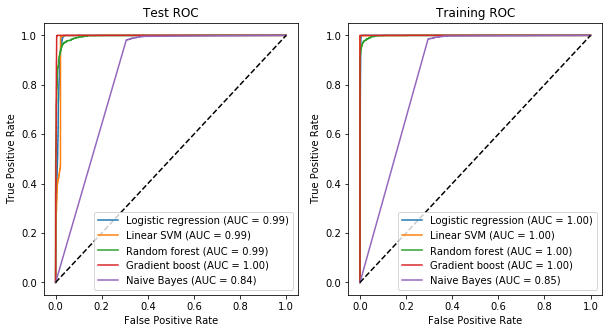

In [16]:
models = [lr_model, svm_model, rf_model, gb_model, nb_model]
names = ["Logistic regression", "Linear SVM",
         "Random forest", "Gradient boost",
         "Naive Bayes"]
get_roc_auc(models, names, X_train, X_test, y_train, y_test)

### Feature importance

Both the random forest and gradient boost have identified most of the profanities as the most important words! Additionally, `word_count`, `unique_word_count`, and `sentiment` are also importance features. These features again confirm our earlier propositions about what our classifiers would consider as distinguishing features.

In [17]:
{k:v for (k, v) in rf_fi.items() if v > 0}

{'fuck': 0.09,
 'shit': 0.05,
 'word_count': 0.04,
 'unique_word_count': 0.04,
 'bitch': 0.03,
 'nigga': 0.03,
 'sentiment': 0.02,
 'fuckin': 0.02,
 'back': 0.01,
 'damn': 0.01,
 'dick': 0.01,
 'gon': 0.01,
 'hate': 0.01,
 'heart': 0.01,
 'hit': 0.01,
 'hoe': 0.01,
 'kill': 0.01,
 'love': 0.01,
 'money': 0.01,
 'motherfucker': 0.01,
 'put': 0.01,
 'rap': 0.01,
 'want': 0.01,
 'yo': 0.01}

In [18]:
{k:v for (k, v) in gb_fi.items() if v > 0}

{'unique_word_count': 0.06,
 'fuck': 0.06,
 'word_count': 0.05,
 'shit': 0.04,
 'bitch': 0.03,
 'sentiment': 0.02,
 'put': 0.02,
 'bout': 0.01,
 'damn': 0.01,
 'dream': 0.01,
 'fuckin': 0.01,
 'god': 0.01,
 'gon': 0.01,
 'hate': 0.01,
 'love': 0.01,
 'money': 0.01,
 'motherfucker': 0.01,
 'nigga': 0.01,
 'suck': 0.01,
 'want': 0.01}

### Conclusion

Detecting explicit songs will become increasingly important as more music starts to live online. We have a responsibility to ensure that songs are distributed to appropriate audiences. Our classification models have proven to be highly effective at this task, with gradient boost being the absolute best out of all.